In [1]:
#Import dependencies
%matplotlib notebook
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot


In [2]:
csv_path="VGS.csv"

In [3]:
videogames_df=pd.read_csv(csv_path)
videogames_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [4]:
#Clear any null values
videogames_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
videogames_clean_df=videogames_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
videogames_clean_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [6]:
videogames_clean_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [7]:
#Check for duplicates
videogames_clean_df[videogames_clean_df.duplicated()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [8]:
print("No duplicates found in this df.")

No duplicates found in this df.


In [9]:
#Rename columns
videogames_clean_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [10]:
videogames_clean_df=videogames_clean_df.rename(columns={'Year_of_Release': 'Year'})
videogames_clean_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [11]:
videogames_clean_df=videogames_clean_df[videogames_clean_df['Year']!=0]
videogames_clean_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


# Line Graph of Avg Sales

In [23]:
#Create line graph of information
#Find Average Sales in North America by Genre
sns.set_style("whitegrid")
line1=go.Scatter(
                x=videogames_clean_df.groupby(['Genre']).mean().reset_index()['Genre'],
                y=videogames_clean_df.groupby(['Genre']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker=dict(size=8),
                line=dict(color='Blue',width=2.5))
layout=dict(
            legend=dict(x=0.77, y=1.2, font=dict(size=10)), legend_orientation="v",
            title="Average Sales of Different Genre Games",
            xaxis=dict(title="Genre",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis=dict(title='Average Sales in North America',gridcolor="#DCDCDC"),
            plot_bgcolor='white')
fig=dict(data=line1,layout=layout)
iplot(fig)

According to North America sales, consumers prefer Platform and Shooter type of video games.

We see that Platform games like Super Mario Bros. and Shoot style games like Call of Duty and Grand Theft Auto sell the most in North America.


# Number of Games Released per year

Using a bar chart

In [13]:
videogames_clean_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


<IPython.core.display.Javascript object>


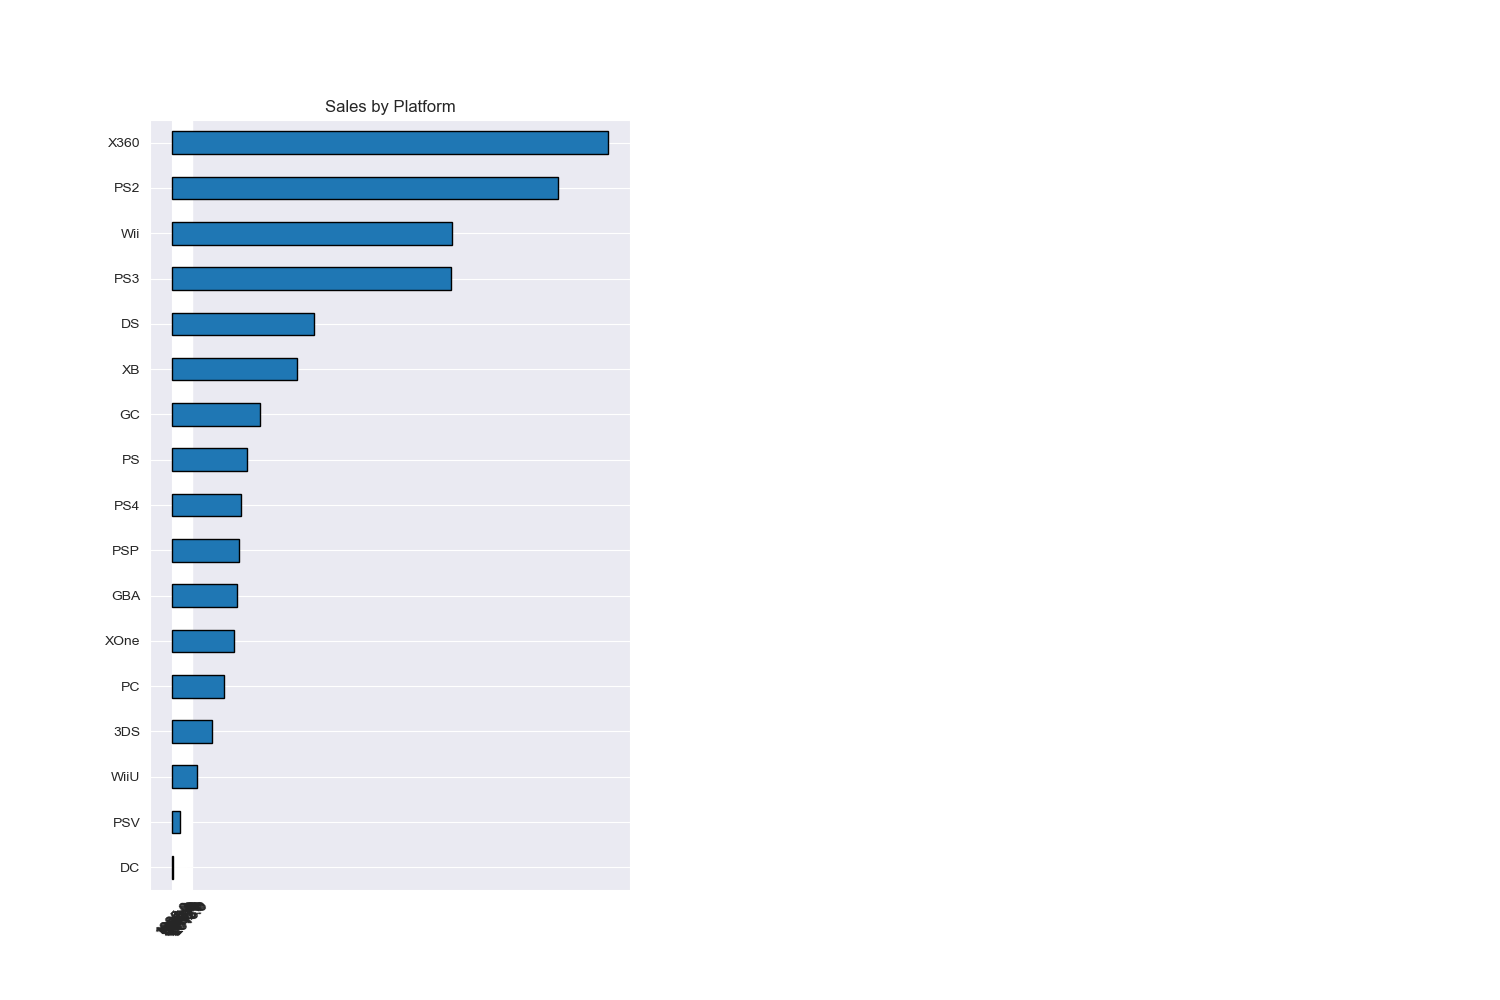

In [15]:
fig=plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1, wspace=0.5, hspace=0.5)
sns.set_style("darkgrid")

plt.subplot(1, 2, 1)
plt.title('North America Sales Years',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year',y='NA_Sales',data=videogames_clean_df.groupby(videogames_clean_df['Year'].sort_values()).sum().NA_Sales.reset_index(),palette='twilight_shifted')
plt.ylabel('North American Sales',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13})
fig.savefig("NA_Sales")

Which video game platform had the most sales in North America?

In [16]:
videogames_clean_df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=True).plot(
                            kind='barh', y='NA_Sales', figsize=(15,10), edgecolor='black'
)
plt.title('Sales by Platform')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.savefig('Platform_sales.png')

In [17]:
videogames_clean_df.groupby('Platform')['NA_Sales'].sum().to_frame('NA_Sales').sort_values(
                                                        by='NA_Sales', ascending=False
                                                        ).head(10)

,NA_Sales
Platform,
X360,533.43
PS2,472.65
Wii,342.91
PS3,341.62
DS,173.40
XB,153.23
GC,107.93
PS,91.76
PS4,84.16


We can see that in North America that Xbox360 has the most video game sales in the region. Followed by the PS2 and Nintendo Wii.

In [18]:
videogames_clean_df.max()

Name            uDraw Studio: Instant Artist
Platform                                XOne
Year                                  2016.0
Genre                               Strategy
Publisher               inXile Entertainment
NA_Sales                               41.36
EU_Sales                               28.96
JP_Sales                                 6.5
Other_Sales                            10.57
Global_Sales                           82.53
Critic_Score                            98.0
Critic_Count                           113.0
User_Score                               9.6
User_Count                           10665.0
Developer                             zSlide
Rating                                     T
dtype: object

# What Year had the most sales in North America?

In [22]:
#Use groupby func to group Year and NA_Sales to find max sales in region
newvgs_df=videogames_clean_df.groupby('Year')['NA_Sales'].sum().to_frame('NA_Sales').sort_values(
                                                        by='NA_Sales', ascending=False
                                                        ).head(10)
newvgs_df

,NA_Sales
Year,
2008.0,256.25
2007.0,235.61
2009.0,231.72
2006.0,225.69
2010.0,213.24
2011.0,190.62
2005.0,178.15
2004.0,173.88
2002.0,163.76


The year 2008 had the most sales in North America with 256.25 million dollars with 2007 coming in second place with 235.61 million dollars in sales in the region.

In [19]:
#Save to new CSV
videogames_clean_df.to_csv("new-VGS.csv", index=True)

# Conclusion

Shooter and Sports video games have sold most in sales in North America.

Xbox360 video games were most popular within the North American region with 533 million dollars in sales. The publisher is Microsoft.

The year with the single most amount of sales in North America was 2008 with 265 million dollars in sales, but the platform with the highest amount of sales was in 2006 with Wii Sports being the most sold video game made by Nintendo with 41 million dollars in sales.
